<a href="https://colab.research.google.com/github/Venkat-Naren/Venkat-Naren/blob/main/anime_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About Dataset**
**Context**

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

**Content**

Anime.csv


*   anime_id - myanimelist.net's unique id identifying an anime.
*   name - full name of anime
*   genre - comma separated list of genres for this anime.
*   type - movie, TV, OVA, etc.
*   episodes - how many episodes in this show. (1 if movie).
*   rating - average rating out of 10 for this anime.
*   members - number of community members that are in this anime's
"group".

Rating.csv

* user_id - non identifiable randomly generated user id.
*anime_id - the anime that this user has rated.
*rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

**Acknowledgements**

Thanks to myanimelist.net API for providing anime data and user ratings.

**Inspiration**

Building a better anime recommendation system based only on user viewing history.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
anime_data = pd.read_csv("/content/anime.csv")

In [4]:
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
anime_data.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [6]:
print("Total Number of Anime Programs are:",anime_data.shape[0])

Total Number of Anime Programs are: 12294


In [7]:
print("Total number of features in this dataset are:",anime_data.shape[1])
print(anime_data.columns.values)

Total number of features in this dataset are: 7
['anime_id' 'name' 'genre' 'type' 'episodes' 'rating' 'members']


**Data Preprocessing**


In [8]:
print("Non-Null Values:", anime_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
Non-Null Values: None


In [9]:
print( "Statistics of rating are:") 
anime_data.rating.describe() 

Statistics of rating are:


count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [10]:
#anime_data.info().T

In [11]:
anime_data.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
#Drop all null values from the dataset
anime_data = anime_data.dropna()

In [13]:
anime_data.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [14]:
print("Non-Null Values:", anime_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB
Non-Null Values: None


In [15]:
rating_bool=anime_data.applymap(np.isreal).rating
rating_bool.describe()

count     12017
unique        1
top        True
freq      12017
Name: rating, dtype: object

In [16]:
anime_data[~anime_data.applymap(np.isreal).all(1)]

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [17]:
#Change unknown "episode" values to 0.
anime_data.loc[anime_data["episodes"] == "Unknown", "episodes"] = 0
anime_data["episodes"] = anime_data["episodes"].astype(int)

# **Rating Dataset**

In [18]:
rating_data=pd.read_csv("/content/rating.csv")
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [19]:
print("Number of entries in the rating dataset: ",rating_data.shape[0])
print("Number of features in the rating dataset: ",rating_data.shape[1])
print("The features in rating dataset are: ",rating_data.columns.values)

Number of entries in the rating dataset:  7813737
Number of features in the rating dataset:  3
The features in rating dataset are:  ['user_id' 'anime_id' 'rating']


In [20]:
result = pd.merge(anime_data,rating_data[["user_id","anime_id","rating"]], on = ["anime_id"],how = "right")

In [21]:
result.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297.0,1,-1
1,24,School Rumble,"Comedy, Romance, School, Shounen",TV,26.0,8.06,178553.0,1,-1
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24.0,7.31,158772.0,1,-1
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13.0,7.85,623511.0,1,-1
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11.0,6.69,84395.0,1,-1


In [22]:
result.rename(columns = {'rating_x':'AverageRating','rating_y':'rating'}, inplace = True)
result.head()

,anime_id,name,genre,type,episodes,AverageRating,members,user_id,rating
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297.0,1,-1
1,24,School Rumble,"Comedy, Romance, School, Shounen",TV,26.0,8.06,178553.0,1,-1
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24.0,7.31,158772.0,1,-1
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13.0,7.85,623511.0,1,-1
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11.0,6.69,84395.0,1,-1


In [23]:
#Drop rows with null Average Rating
result.dropna(inplace=True)

In [24]:
print("Final Dataset: ")
display(result.head(15))

Final Dataset: 


,anime_id,name,genre,type,episodes,AverageRating,members,user_id,rating
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297.0,1,-1
1,24,School Rumble,"Comedy, Romance, School, Shounen",TV,26.0,8.06,178553.0,1,-1
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24.0,7.31,158772.0,1,-1
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13.0,7.85,623511.0,1,-1
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11.0,6.69,84395.0,1,-1
5,355,Shakugan no Shana,"Action, Drama, Fantasy, Romance, School, Super...",TV,24.0,7.74,297058.0,1,-1
6,356,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural",TV,24.0,7.58,374880.0,1,-1
7,442,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...,"Adventure, Comedy, Drama, Historical, Shounen,...",Movie,1.0,7.17,120571.0,1,-1
8,487,Girls Bravo: Second Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,13.0,6.90,57110.0,1,-1
9,846,School Rumble Ni Gakki,"Comedy, Romance, School, Shounen",TV,26.0,8.15,93095.0,1,-1


**Exploratory data analysis (EDA)**

In [25]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813611 entries, 0 to 7813736
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   anime_id       int64  
 1   name           object 
 2   genre          object 
 3   type           object 
 4   episodes       float64
 5   AverageRating  float64
 6   members        float64
 7   user_id        int64  
 8   rating         int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 596.1+ MB


In [26]:
result['episodes']=result['episodes'].astype(int)
result['members']=result['members'].astype(int)
result.head()

,anime_id,name,genre,type,episodes,AverageRating,members,user_id,rating
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1,-1
1,24,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553,1,-1
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772,1,-1
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511,1,-1
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395,1,-1


In [27]:
result.duplicated().sum() #duplicate values sum

1

In [28]:
result.type.value_counts(normalize=True) #categorical variables percentage

TV         0.676204
Movie      0.134625
OVA        0.102425
Special    0.071586
ONA        0.011768
Music      0.003392
Name: type, dtype: float64

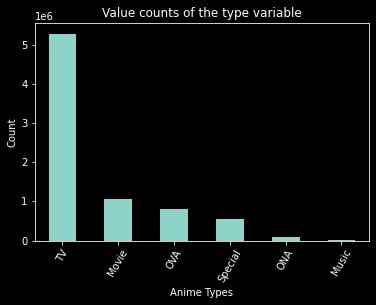

In [29]:
plt.style.use('dark_background')

result.type.value_counts().plot(kind='bar') # categorical variable
plt.title("Value counts of the type variable")
plt.xlabel("Anime Types")
plt.xticks(rotation=60 )
plt.ylabel("Count")
plt.show()

In [30]:
#Average Rating of each Anime
grouped_by_anime_id = result.groupby(["anime_id","name","genre"])[["AverageRating"]].mean().reset_index()
grouped_by_anime_id.head()

,anime_id,name,genre,AverageRating
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.82
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",8.40
2,6,Trigun,"Action, Comedy, Sci-Fi",8.32
3,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",7.36
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",7.06


In [31]:
#top 10 based on average rating of each show.
sorted_grouped_by_anime_id = grouped_by_anime_id.sort_values(by = ["AverageRating"],ascending=False).reset_index()
sorted_grouped_by_anime_id.head(10)

,index,anime_id,name,genre,AverageRating
0,8795,23005,Mogura no Motoro,Slice of Life,9.50
1,10747,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",9.37
2,3965,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26
3,9831,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",9.25
4,9499,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",9.25
5,5673,9253,Steins;Gate,"Sci-Fi, Thriller",9.17
6,5997,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",9.16
7,10935,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",9.15
8,6465,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",9.13
9,7249,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",9.11


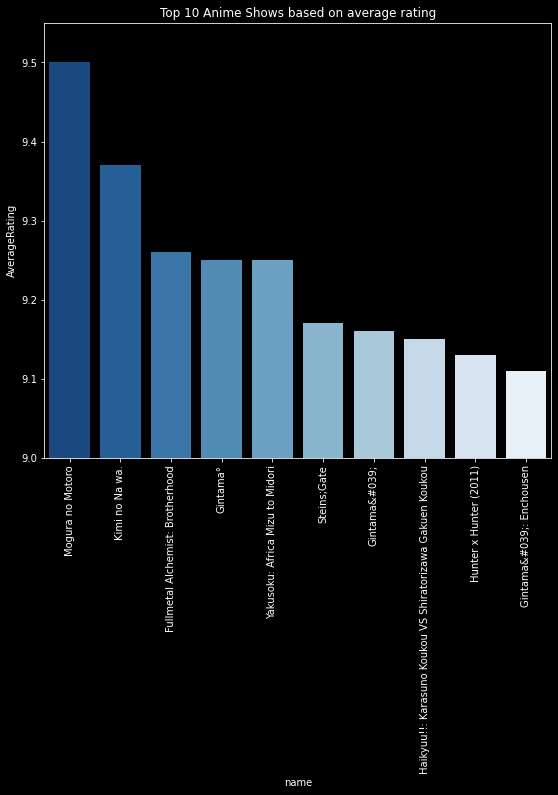

In [32]:
#Plot best 10 anime shows based on average ratings
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
plt.title("Top 10 Anime Shows based on average rating")
plt.ylim(9.0,9.55)
plt.xticks(rotation=90)
A=sns.barplot(sorted_grouped_by_anime_id.name[:10],sorted_grouped_by_anime_id['AverageRating'][:10],palette="Blues_r")

In [33]:
#Plot worst 10 anime shows based on average ratings
sorted_grouped_by_anime_id.tail(10)

,index,anime_id,name,genre,AverageRating
11152,10784,32388,Undouki Kenshin Manual Taiou Taisou,Kids,2.72
11153,10051,29949,Nami,Dementia,2.67
11154,10573,31634,Kokuhaku,Horror,2.67
11155,9087,24259,Mechano: Scientific Attack Force,"Comedy, Dementia, Fantasy, Horror, Music, Parody",2.55
11156,7166,14781,Roboteuwang Sseonsyakeu,"Action, Mecha, Sci-Fi",2.49
11157,385,413,Hametsu no Mars,"Horror, Sci-Fi",2.37
11158,6960,13405,Utsu Musume Sayuri,"Comedy, Dementia",2.14
11159,2929,3287,Tenkuu Danzai Skelter+Heaven,"Mecha, Sci-Fi",2.00
11160,8188,20007,Hi Gekiga Ukiyoe Senya Ichiya,"Action, Hentai",1.92
11161,11160,34476,Platonic Chain: Ansatsu Jikkouchuu,"Sci-Fi, Slice of Life",1.67


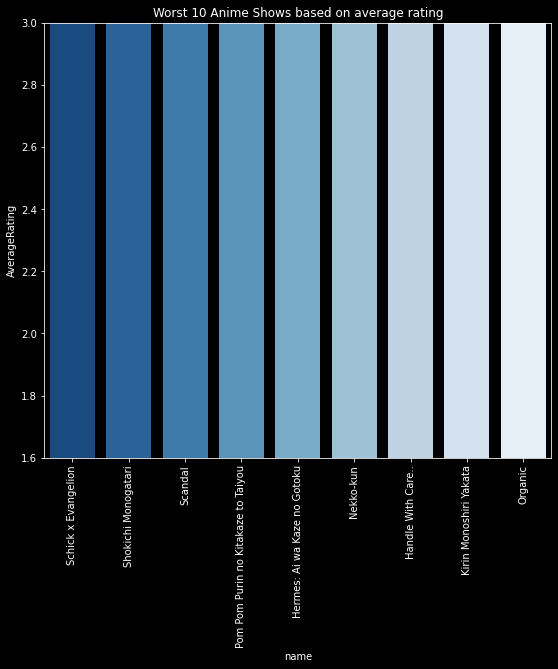

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 2)
plt.title("Worst 10 Anime Shows based on average rating")
plt.ylim(1.6,3.0)
plt.xticks(rotation=90)
B=sns.barplot(sorted_grouped_by_anime_id.name[9427:9436],sorted_grouped_by_anime_id['AverageRating'][9427:9436],palette="Blues_r")
#B=sns.barplot(sorted_grouped_by_anime_id.name[11152:11162],sorted_grouped_by_anime_id['AverageRating'][11152:11162],palette="Blues_r")


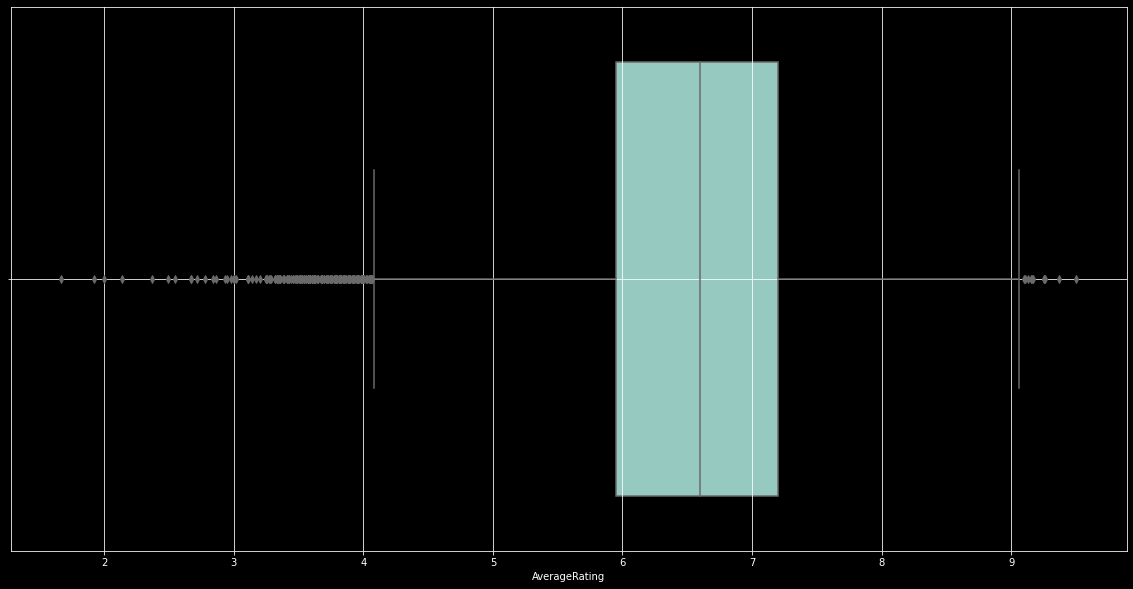

In [35]:
#Distribution of Average rating
plt.figure(figsize=(20,10))
sns.boxplot(grouped_by_anime_id["AverageRating"])
plt.grid()
plt.show()

This shows that most average ratings are between 4 and 9 with 6-7 being the most dense area.
There are many outliers in the data below 4 and more than 9

#**Word Cloud as per genre**

In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
genres = sorted_grouped_by_anime_id["genre"]

comment_words = ''
stopwords = set(STOPWORDS)
 
for genre in genres:
 
    genre = str(genre)
    # split the different genres
    tokens = genre.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    

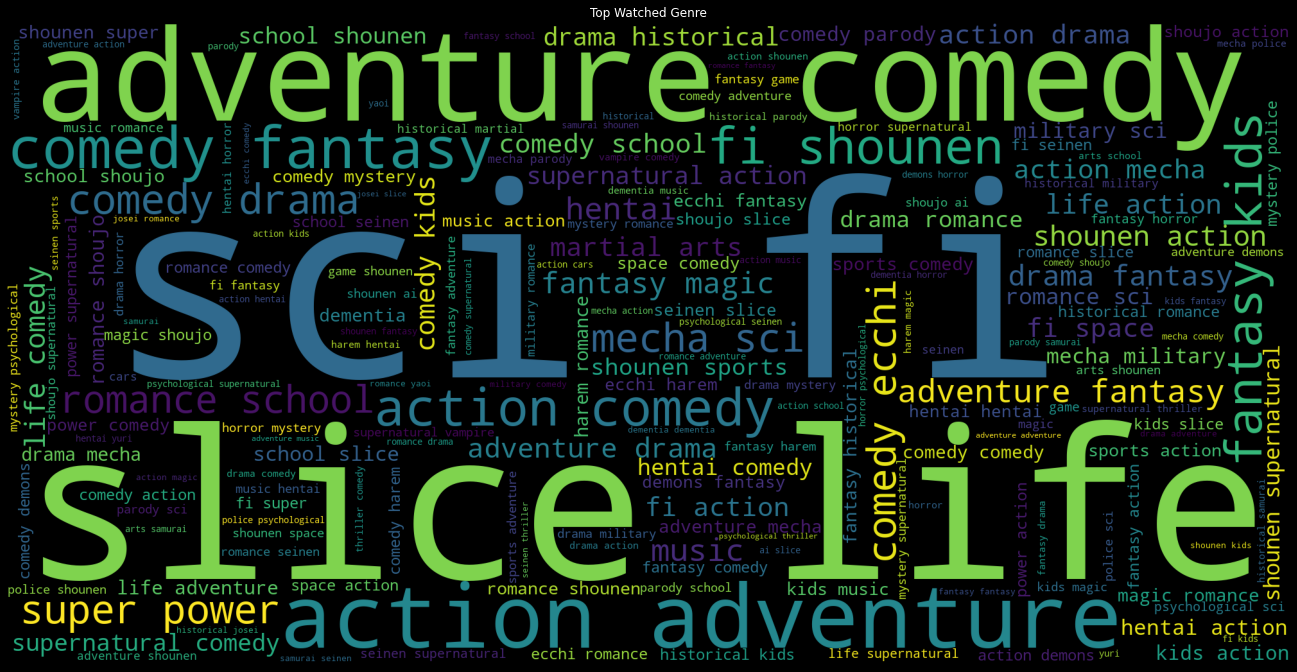

In [37]:
# Display the generated Word Cloud
wordcloud = WordCloud(width = 2000, height = 1000, background_color ='black', stopwords = stopwords, min_font_size = 10).generate(comment_words)
    
#Plot the wordcloud
plt.figure(figsize = (23, 15), facecolor = None )
plt.imshow(wordcloud)
plt.title("Top Watched Genre")
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.show()

 **Top watched genres are sci-fi, slice life, adventure, comedy, action and adventure**

In [38]:
#grouping anime types
anime_type=result['type']
print("The different type of Anime Shows are: ",anime_type.unique())

labels = anime_type.value_counts().index
values = anime_type.value_counts().values



The different type of Anime Shows are:  ['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music']


No handles with labels found to put in legend.


([<matplotlib.patches.Wedge at 0x7f7614fbda90>,
 [Text(-0.578292328861296, 0.9357232402693538, 'TV'),
  Text(-0.04479661139696163, -1.0990874685880783, 'Movie'),
  Text(0.7119813977136458, -0.8385001427010753, 'OVA'),
  Text(1.0441084864542909, -0.34617548803190823, 'Special'),
  Text(1.0981324084833515, -0.0640719395566725, 'ONA'),
  Text(1.099937564307897, -0.011719838924277252, 'Music')])

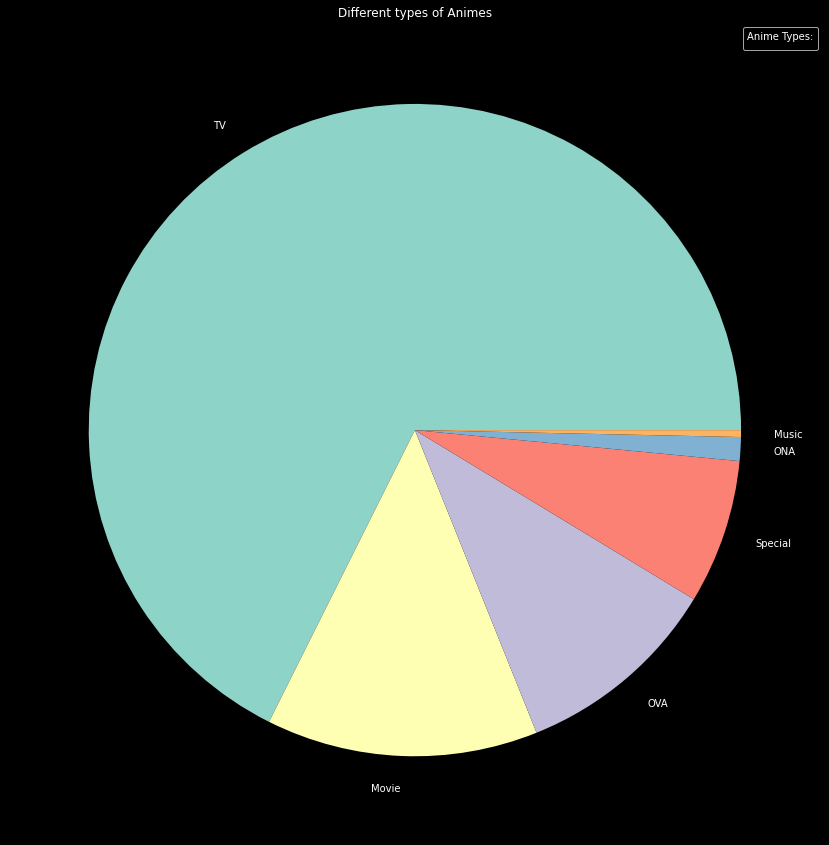

In [39]:
#Visualizing different types

import plotly.graph_objects as go

plt.figure(figsize = (23, 15), facecolor = None )
plt.title("Different types of Animes")
plt.legend(title = "Anime Types:")
plt.axis("off")
plt.pie(values,labels=labels)



In [40]:
result.head()

,anime_id,name,genre,type,episodes,AverageRating,members,user_id,rating
0,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297,1,-1
1,24,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553,1,-1
2,79,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772,1,-1
3,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511,1,-1
4,241,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395,1,-1


Average Rating based on type: 
TV : 7.74
Movie : 7.81
Special : 7.33
OVA : 7.2
ONA : 7.05
Music : 7.03


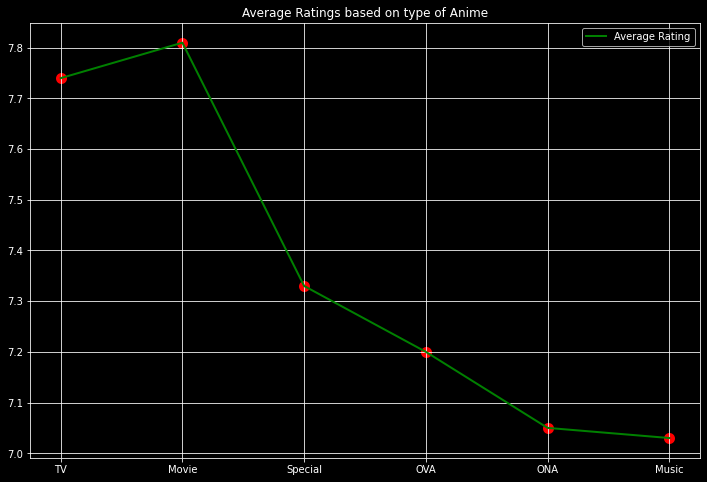

In [41]:
mean_avgrat_type = [round(result[result["type"] == "TV"]["AverageRating"].mean(),2),
                    round(result[result["type"] == "Movie"]["AverageRating"].mean(),2),
                    round(result[result["type"] == "Special"]["AverageRating"].mean(),2),
                    round(result[result["type"] == "OVA"]["AverageRating"].mean(),2),
                    round(result[result["type"] == "ONA"]["AverageRating"].mean(),2),
                    round(result[result["type"] == "Music"]["AverageRating"].mean(),2)]

labels = ["TV","Movie","Special","OVA","ONA","Music"]
print("Average Rating based on type: ")
for i in range(6):
    print(labels[i],":",mean_avgrat_type[i])
    
#Plot the average rating of every type.
plt.figure(figsize = (12,8))
plt.plot(["TV","Movie","Special","OVA","ONA","Music"],mean_avgrat_type,label = "Average Rating", c = "Green",linewidth = 2)
plt.scatter(labels,mean_avgrat_type, c = "Red",linewidth = 5)
plt.title("Average Ratings based on type of Anime")
plt.grid()
plt.legend()
plt.show()

In [44]:
#top 100 anime based on AverageRating
top_100_animes=result.groupby(["anime_id","name","genre","episodes"])[["AverageRating"]].mean().reset_index()
sorted_top_100_anime_shows=top_100_animes.sort_values(by = ["AverageRating"],ascending=False).reset_index()[:100]
display(sorted_top_100_anime_shows)

,index,anime_id,name,genre,episodes,AverageRating
0,8795,23005,Mogura no Motoro,Slice of Life,1,9.50
1,10747,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",1,9.37
2,3965,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",64,9.26
3,9831,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",51,9.25
4,9499,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",1,9.25
...,...,...,...,...,...,...
95,4381,5941,Cross Game,"Comedy, Drama, Romance, School, Sports",50,8.53
96,6026,10030,Bakuman. 2nd Season,"Comedy, Drama, Romance, Shounen",25,8.53
97,10201,30346,Doukyuusei (Movie),"Romance, School, Shounen Ai, Slice of Life",1,8.53
98,3273,3784,Evangelion: 2.0 You Can (Not) Advance,"Action, Mecha, Sci-Fi",1,8.53


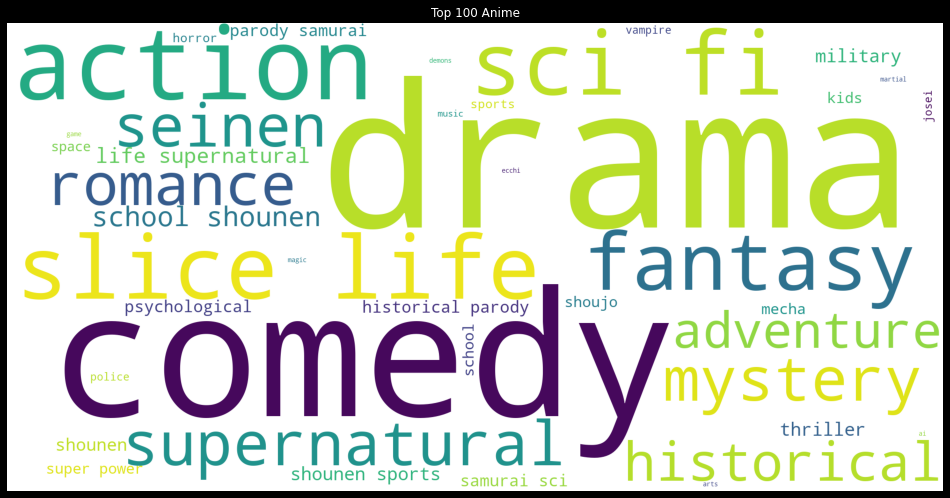

In [45]:
genres = sorted_top_100_anime_shows["genre"]

comment_words = ''
stopwords = set(STOPWORDS)
 
for genre in genres:
 
    genre = str(genre)
    # split the different genres
    tokens = genre.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 2000, height = 1000, background_color ='white', stopwords = stopwords, min_font_size = 8).generate(comment_words)
    
#Plot the wordcloud
plt.figure(figsize = (13, 10), facecolor = None)
plt.imshow(wordcloud)
plt.title("Top 100 Anime")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

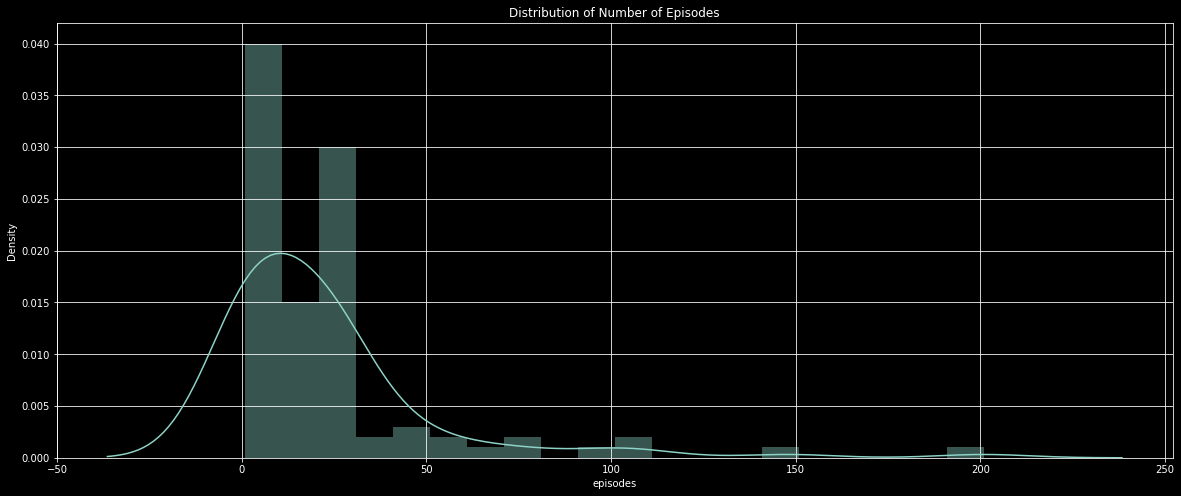

In [46]:
#Number of episodes in top 100 animes

plt.figure(figsize=(20,8))
sns.distplot(sorted_top_100_anime_shows["episodes"])
plt.title("Distribution of Number of Episodes")
plt.grid()
plt.show()

The plot suggest that the most popular anime shows have 1-50 episodes with denser population between 1-25.